# 6. Калибровка моделей

Задание:

Модифицировать скрипт любой из лабораторных работ 3, 4 или 5

Провести калибровку модели. Оценить долю наблюдений в тестовой выборке, для которых есть класс, вероятность принадлежать которому больше 0.8.

Набор данных тот же, что и в предыдущих лабораторных работах.

Ответ:

В данном задании была построена модель для распознавания целевой переменной (отклика) на основе Bank Marketing Data Set, а именно был модифицирован скрипт лабораторной работы 3 Случайный лес (Random Forest). Была произведена калибровка модели, а также были оценены доли наблюдений в тестовой выборке, для которых есть классы "0" и "1", вероятность принадлежать каждому из которых больше 0.8, равные соответственно 0.484 и 0.48. Общая доля наблюдений обоих классов по данному условию равна 0.964.

In [397]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [398]:
df = pd.read_csv('bank-full.csv', delimiter=';')

In [399]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [400]:
df.shape

(45211, 17)

In [401]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [402]:
# Атрибут 'duration' сильно влияет на цель вывода (например, если duration=0, то y='no'),
# поэтому эти данные отбрасываем для получения реалистичной прогностической модели

df = df.loc[df['duration'] != 0]
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [403]:
df.shape

(45208, 17)

In [404]:
# Проверим сбалансированность выборки

df['y'].value_counts() # выборка не сбалансированная, тк разница в 8 раз

no     39919
yes     5289
Name: y, dtype: int64

In [405]:
df['y'].value_counts(normalize=True) # выборка не сбалансированная, тк разница в 8 раз

no     0.883007
yes    0.116993
Name: y, dtype: float64

In [406]:
# Получим новый датафрейм только со значением y=yes

df_one = df.loc[df['y'] == 'yes']
df_one.shape

(5289, 17)

In [407]:
# Получим новый датафрейм только со значением y=no и обновим индексы

df_y = df.loc[df['y'] == 'no']
df_y = df_y.reset_index(drop=True)
df_y.shape

(39919, 17)

In [408]:
# Отделим первые 10578 строк значений в датафрейме только со значением y=no

df_two = df_y.loc[:10577]
df_two.shape

(10578, 17)

In [409]:
# Создадим новый датафрейм, состоящий из двойного набора данных со значением отклика y=yes (5289*2=10578 строк)
# и набора данных со значением отклика y=no (10578 строк)

df_new = pd.concat([df_one, df_one, df_two], ignore_index=True)
df_new.shape

(21156, 17)

In [410]:
# Проверим сбалансированность выборки нового датафрейма

df_new['y'].value_counts() # выборка сбалансирована

yes    10578
no     10578
Name: y, dtype: int64

In [411]:
df_new['y'].value_counts(normalize=True) # выборка сбалансирована

yes    0.5
no     0.5
Name: y, dtype: float64

{0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'}


Text(0.5, 1.0, 'Распределение частотности классов в атрибуте job')

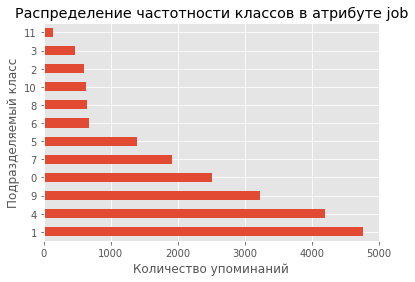

In [412]:
# Заменим категориальные признаки на числовые во всем датафрейме

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
mapped_job = pd.Series(label_encoder.fit_transform(df_new['job']))

mapped_job.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

plt.xlabel('Количество упоминаний')
plt.ylabel('Подразделяемый класс')
plt.title('Распределение частотности классов в атрибуте job')

In [413]:
categorical_columns = df_new.columns[df_new.dtypes == 'object'].union(['job'])
for column in categorical_columns:
    df_new[column] = label_encoder.fit_transform(df_new[column])
df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [414]:
df_new.shape

(21156, 17)

In [415]:
# Преобразуем в столбцы с различными уникальными значениями, которые могут принимать категориальные столбцы исходной выборки

onehot_encoder = OneHotEncoder(sparse=False)

encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(df_new[categorical_columns]))
encoded_categorical_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [416]:
#  Разделим предикторы и отклики

X = df_new.iloc[:, :-1]
y = df_new.iloc[:, 16] 

In [417]:
#  Разделим на обучающую и тестовую выборку

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 1234)  

In [418]:
# Подбор внешних параметров с помощью GridSearch

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42,                            
                               n_estimators=80,               # число деревьев в лесу                              
                               criterion='gini',              # функция для impurity ('gini' или 'entropy')                        
                               max_depth=5,                         
                               max_features='auto',           # sqrt(k)                            
                               max_leaf_nodes=None,           # максимальное число конечных узлов. сейчас - без ограничений                           
                               min_impurity_decrease=0.001,   # минимальное уменьшение загрязнения                        
                               bootstrap=True,                             
                               min_samples_leaf=10,           # минимальное число наблюдений в узле потомке                       
                               min_samples_split=15,          # минимальное число наблюдений в узле родителей                        
                               min_weight_fraction_leaf=0.0,                   
                               verbose=0,                     # объем промежуточных результатов в ходе обучения                          
                               oob_score=True,                # вычислять out-of-bag ошибку                   
                               warm_start=False,              # использовать результаты предыдущего вызова и нарастить предыдущий лес              
                               class_weight=None)             # веса классов для балансировки обучения

param_grid = {  
    'n_estimators': [40, 60, 80, 100],
    'max_depth': [4, 6, 8],
    'max_features': [3, 6, 10],
    'min_samples_split': [6, 8, 10],
    'min_samples_leaf': [4, 6, 8]}

grid_search_res = GridSearchCV(model, param_grid=param_grid, cv=2,    # 2 фолда                        
                               scoring='recall',                      # выбор критерия качества    
                               error_score='raise',                   # поведение в случае ошибки при вычислении критерия качества                   
                               refit=True,                            # обучить модель с лучшими значениями параметроы
                               pre_dispatch=None, 
                               verbose=0)

grid_search_res.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
             estimator=RandomForestClassifier(max_depth=5,
                                              min_impurity_decrease=0.001,
                                              min_samples_leaf=10,
                                              min_samples_split=15,
                                              n_estimators=80, oob_score=True,
                                              random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'max_features': [3, 6, 10],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [6, 8, 10],
                         'n_estimators': [40, 60, 80, 100]},
             pre_dispatch=None, scoring='recall')

In [436]:
 #  Лучший набор значений гиперпараметров

best_hyperparams = grid_search_res.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 100}


In [420]:
# Значение критерия качества для лучших значений гиперпараметров 

best_CV_score = grid_search_res.best_score_
print('Лучший recall', best_CV_score)

Лучший recall 0.9584863033041514


In [421]:
# Лучшая модель
best_model = grid_search_res.best_estimator_

# recall на тестовом множестве для лучшей модели
test_recall = best_model.score(X_test,y_test)

# Значение критерия качества для лучших значений гиперпараметров 
print('Лучший recall на тестовом множестве', test_recall)

Лучший recall на тестовом множестве 0.9674878258378689


In [422]:
grid_search_res.cv_results_

{'mean_fit_time': array([0.18684912, 0.26371801, 0.36044323, 0.45428932, 0.17193806,
        0.2601583 , 0.34185767, 0.43241656, 0.17310798, 0.27053535,
        0.34422529, 0.42852533, 0.17693377, 0.25543451, 0.34983432,
        0.43190193, 0.1715802 , 0.25330675, 0.35503626, 0.42594743,
        0.17730892, 0.26131213, 0.34557235, 0.42609978, 0.16994345,
        0.25767446, 0.35004473, 0.42555976, 0.18112659, 0.25840819,
        0.34629369, 0.42784762, 0.17077029, 0.26967943, 0.34544349,
        0.42755866, 0.21152163, 0.32603776, 0.41256607, 0.52179706,
        0.20650172, 0.32167232, 0.41567719, 0.51207209, 0.21770024,
        0.30723631, 0.42764604, 0.51971018, 0.20747375, 0.31125331,
        0.40215337, 0.51290464, 0.20497477, 0.3182714 , 0.40823722,
        0.51082134, 0.21017659, 0.31034541, 0.40716183, 0.51727033,
        0.20646858, 0.30460274, 0.39853919, 0.49506724, 0.20850599,
        0.30513871, 0.41027677, 0.50515807, 0.20603561, 0.30888724,
        0.40858626, 0.51473653,

In [437]:
# Распознаем классы с помощью модели

y_pred_train = grid_search_res.predict(X_train)
y_pred_test = grid_search_res.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[1 1 1 ... 1 0 1]
[0 0 0 ... 0 1 0]


In [424]:
# Распознаем вероятности принадлежать классам

y_pred_train2 = grid_search_res.predict_proba(X_train)
y_pred_test2 = grid_search_res.predict_proba(X_test)
print(y_pred_train2)
print(y_pred_test2)

[[0.        1.       ]
 [0.        1.       ]
 [0.        1.       ]
 ...
 [0.        1.       ]
 [0.9777889 0.0222111]
 [0.        1.       ]]
[[0.98392794 0.01607206]
 [0.98244004 0.01755996]
 [0.98392794 0.01607206]
 ...
 [0.98392794 0.01607206]
 [0.         1.        ]
 [0.98392794 0.01607206]]


In [425]:
# Таблица сопряженности. Измеряем, насколько хороша модель

from sklearn import metrics

# Обучающая выборка

print(u'Таблица сопряженности для обучающей выборки')

conf_mat = metrics.confusion_matrix(y_train, y_pred_train)
conf_mat = pd.DataFrame(conf_mat, index=grid_search_res.classes_, columns=grid_search_res.classes_)
conf_mat

Таблица сопряженности для обучающей выборки


,0,1
0,6954,138
1,288,6794


In [426]:
# Тестовая выборка

print(u'Таблица сопряженности для тестовой выборки')

conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
conf_mat = pd.DataFrame(conf_mat, index=grid_search_res.classes_, columns=grid_search_res.classes_)
conf_mat

Таблица сопряженности для тестовой выборки


,0,1
0,3421,65
1,162,3334


In [427]:
# Получим recall на обучающей и тестовой выборках

from sklearn.metrics import recall_score

print('Recall на обучающей выборке', recall_score(y_train, y_pred_train)*100)
print('Recall на тестовой выборке', recall_score(y_test, y_pred_test)*100)

Recall на обучающей выборке 95.93335216040666
Recall на тестовой выборке 95.36613272311213


In [428]:
# Посчитаем precision, recall и f1-score

print(metrics.classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3583
           1       0.95      0.98      0.97      3399

    accuracy                           0.97      6982
   macro avg       0.97      0.97      0.97      6982
weighted avg       0.97      0.97      0.97      6982



In [429]:
# Проведем калибровку вероятностей

from sklearn.calibration import CalibratedClassifierCV

model_sigm = CalibratedClassifierCV(grid_search_res, cv=2, method='sigmoid')  # 2 фолда; методы бывают: ‘sigmoid’ или ‘isotonic’

In [430]:
# Обучаем модель (дерево)

model_sigm.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=GridSearchCV(cv=2, error_score='raise',
                                                   estimator=RandomForestClassifier(max_depth=5,
                                                                                    min_impurity_decrease=0.001,
                                                                                    min_samples_leaf=10,
                                                                                    min_samples_split=15,
                                                                                    n_estimators=80,
                                                                                    oob_score=True,
                                                                                    random_state=42),
                                                   param_grid={'max_depth': [4,
                                                                             6,
                                      

In [431]:
# Калиброванные вероятности

model_sigm.predict_proba(X_test)

array([[0.98801668, 0.01198332],
       [0.98799672, 0.01200328],
       [0.98801668, 0.01198332],
       ...,
       [0.98801668, 0.01198332],
       [0.00398322, 0.99601678],
       [0.98801668, 0.01198332]])

In [432]:
# Оценить долю наблюдений в тестовой выборке, для которых есть класс, вероятность принадлежать которому больше 0.8

# Преобразуем в датафрейм

share_zero = pd.DataFrame(model_sigm.predict_proba(X_test), columns=['zero','one'])
share_zero.head()

,zero,one
0,0.988017,0.011983
1,0.987997,0.012003
2,0.988017,0.011983
3,0.987997,0.012003
4,0.003983,0.996017


In [433]:
# Класс "0" (значение yes)

share_zero_row = share_zero.shape[0]                  # количество строк в тестовом выборке
share_one = share_zero.loc[share_zero['zero'] > 0.8]  # выбираем строки класса "0", вероятность принадлежать которому больше 0.8
share_one_row = share_one.shape[0]                    # количество строк класса "0", вероятность принадлежать которому больше 0.8
share_of_class_zero = round(share_one_row/share_zero_row, 3)    

print('Доля наблюдений класса "0" в тестовой выборке, вероятность принадлежать которому больше 0.8:', share_of_class_zero)

Доля наблюдений класса "0" в тестовой выборке, вероятность принадлежать которому больше 0.8: 0.484


In [434]:
# Kласс "1" (значение no)

share_zero_row = share_zero.shape[0]                  # количество строк в тестовом выборке
share_two = share_zero.loc[share_zero['one'] > 0.8]   # выбираем строки класса "1", вероятность принадлежать которому больше 0.8
share_two_row = share_two.shape[0]                    # количество строк класса "1", вероятность принадлежать которому больше 0.8
share_of_class_one = round(share_two_row/share_zero_row, 3)   

print('Доля наблюдений класса "1" в тестовой выборке, вероятность принадлежать которому больше 0.8:', share_of_class_one)

Доля наблюдений класса "1" в тестовой выборке, вероятность принадлежать которому больше 0.8: 0.48


In [435]:
#  Альтернатива заданию: классы "0" и "1" вместе

share_of_class_common = share_of_class_zero + share_of_class_one

print('Общая доля наблюдений классов "0" и "1" в тестовой выборке, вероятность принадлежать каждому из которых больше 0.8:', share_of_class_common)

Общая доля наблюдений классов "0" и "1" в тестовой выборке, вероятность принадлежать каждому из которых больше 0.8: 0.964
